# Importe Data

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Sleep_health_and_lifestyle_dataset(in).csv to Sleep_health_and_lifestyle_dataset(in).csv
User uploaded file "Sleep_health_and_lifestyle_dataset(in).csv" with length 24139 bytes


In [2]:
import pandas as pd
df = pd.read_csv('Sleep_health_and_lifestyle_dataset(in).csv')
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Tranformaciones iniciales

Se realiza el cambio de vacíos por la nueva marca "No Sleep Disorder"

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Transformación de Sleep Disorder
df['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True)


/tmp/ipython-input-1524420187.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('No Sleep Disorder', inplace=True)


Se procesa la columna "Bloos Pressure" para dividir las mediciones Sistolicas y Diastolicas de los datos para poder tener un mejor control de esta categoría.

In [4]:
# Procesamiento 'Blood Pressure'
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic Pressure'] = pd.to_numeric(df['Systolic Pressure'])
df['Diastolic Pressure'] = pd.to_numeric(df['Diastolic Pressure'])

display(df.head())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


### Transformación de Variables Categóricas

Se identifican las columnas categóricas como 'Gender', 'Occupation' y 'BMI Category' y se aplica codificación one-hot (one-hot encoding) para convertirlas en un formato numérico. Esta técnica crea nuevas columnas binarias para cada categoría única.

In [16]:
import pandas as pd

# Identificar columnas categóricas a transformar (excluyendo 'Sleep Disorder' ya manejado)
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Mostrar las primeras filas del DataFrame con las variables codificadas
display(df_encoded.head())

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Systolic Pressure,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_No Sleep Disorder,Sleep Disorder_Sleep Apnea
0,1,27,6.1,6,42,6,126/83,77,4200,126,...,False,False,False,True,False,False,False,True,True,False
1,2,28,6.2,6,60,8,125/80,75,10000,125,...,False,False,False,False,False,False,False,False,True,False
2,3,28,6.2,6,60,8,125/80,75,10000,125,...,False,False,False,False,False,False,False,False,True,False
3,4,28,5.9,4,30,8,140/90,85,3000,140,...,True,False,False,False,False,False,True,False,False,True
4,5,28,5.9,4,30,8,140/90,85,3000,140,...,True,False,False,False,False,False,True,False,False,True


# Task
Prepare the `df_encoded` dataset by selecting features and the `Quality of Sleep` target variable, excluding 'Person ID'. Then, split this data into training and test sets to train and evaluate a regression model (e.g., RandomForestRegressor). Analyze and visualize the feature importance from the trained model to identify key factors influencing sleep quality, and evaluate the model's performance using R-squared, MAE, and MSE. Finally, present the model results, feature importance, and evaluation metrics, discussing how lifestyle and cardiovascular health factors influence sleep quality, referencing previously identified correlations.

## Preparar Datos para el Modelado

### Subtask:
Se preparará el conjunto de datos `df_encoded` seleccionando las características (variables independientes) y la variable objetivo (`Quality of Sleep`). Se eliminarán columnas irrelevantes como 'Person ID'.


**Reasoning**:
I will prepare the dataset by separating the target variable 'Quality of Sleep' into `y` and the features into `X`, excluding 'Person ID' and 'Quality of Sleep' from the features.



In [19]:
y = df_encoded['Quality of Sleep']
X = df_encoded.drop(columns=['Quality of Sleep', 'Person ID', 'Blood Pressure'])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 rows of X:")
display(X.head())
print("First 5 values of y:")
display(y.head())

Shape of X: (374, 24)
Shape of y: (374,)
First 5 rows of X:


,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure,Gender_Male,Occupation_Doctor,...,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_No Sleep Disorder,Sleep Disorder_Sleep Apnea
0,27,6.1,42,6,77,4200,126,83,True,False,...,False,False,False,True,False,False,False,True,True,False
1,28,6.2,60,8,75,10000,125,80,True,True,...,False,False,False,False,False,False,False,False,True,False
2,28,6.2,60,8,75,10000,125,80,True,True,...,False,False,False,False,False,False,False,False,True,False
3,28,5.9,30,8,85,3000,140,90,True,False,...,True,False,False,False,False,False,True,False,False,True
4,28,5.9,30,8,85,3000,140,90,True,False,...,True,False,False,False,False,False,True,False,False,True


First 5 values of y:


,Quality of Sleep
0,6
1,6
2,6
3,4
4,4


## Dividir Datos en Entrenamiento y Prueba

### Subtask:
Se dividirá el conjunto de datos en subconjuntos de entrenamiento y prueba para evaluar la capacidad de generalización del modelo, usando una proporción estándar (por ejemplo, 80% entrenamiento, 20% prueba).


**Reasoning**:
To prepare the data for model training and evaluation, I will split the features (X) and target variable (y) into training and testing sets using a 80/20 ratio, ensuring reproducibility with a fixed random state. This step is crucial for assessing the model's generalization capabilities.



In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (299, 24)
Shape of X_test: (75, 24)
Shape of y_train: (299,)
Shape of y_test: (75,)


**Reasoning**:
Now that `X_train` and `y_train` have been correctly prepared and re-split, I will retry training the `RandomForestRegressor` model to address the previous `ValueError` and ensure the model is fit on appropriate numerical data.



In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for GradientBoostingRegressor
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.05],
    'max_depth': [5],
    'min_samples_split': [2],
    'min_samples_leaf': [2]
}

# Instantiate GridSearchCV
grid_search_gbr = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV to the training data
grid_search_gbr.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found for GradientBoostingRegressor: ", grid_search_gbr.best_params_)
print("Best R-squared score found for GradientBoostingRegressor: ", grid_search_gbr.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found for GradientBoostingRegressor:  {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best R-squared score found for GradientBoostingRegressor:  0.9744115960437376


## Evaluar el GradientBoostingRegressor Optimizado

### Subtask:
Evaluar el rendimiento del GradientBoostingRegressor optimizado en el conjunto de prueba y mediante validación cruzada para confirmar las mejoras en precisión y robustez. Calcular R-squared, MAE y MSE.


**Reasoning**:
To evaluate the optimized GradientBoostingRegressor, I will first retrieve the best estimator from the GridSearchCV results. Then, I will make predictions on the test set and calculate the R-squared, MAE, and MSE to assess its performance. Additionally, I will perform cross-validation on the full dataset to evaluate the model's robustness and generalization capabilities, calculating the same metrics.



In [36]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np

# 1. Obtener el mejor estimador (modelo optimizado) del objeto grid_search_gbr
best_gbr_model = grid_search_gbr.best_estimator_

# 2. Utilizar el modelo optimizado para realizar predicciones sobre el conjunto de prueba X_test
y_pred_gbr_optimized = best_gbr_model.predict(X_test)

# 3. Calcular las métricas de rendimiento para el conjunto de prueba
r2_gbr_test = r2_score(y_test, y_pred_gbr_optimized)
mae_gbr_test = mean_absolute_error(y_test, y_pred_gbr_optimized)
mse_gbr_test = mean_squared_error(y_test, y_pred_gbr_optimized)

print("Performance on Test Set (Optimized GradientBoostingRegressor):")
print(f"R-squared: {r2_gbr_test:.4f}")
print(f"MAE: {mae_gbr_test:.4f}")
print(f"MSE: {mse_gbr_test:.4f}")

# 4. Realizar una validación cruzada para el modelo optimizado
scoring = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error'
}

cv_results_gbr = cross_validate(best_gbr_model, X, y, cv=5, scoring=scoring, n_jobs=-1)

r2_scores_gbr = cv_results_gbr['test_r2']
mae_scores_gbr = -cv_results_gbr['test_mae'] # Convert negative MAE to positive
mse_scores_gbr = -cv_results_gbr['test_mse'] # Convert negative MSE to positive

print("\nCross-validation Performance (Optimized GradientBoostingRegressor):")
print(f"Average R-squared: {np.mean(r2_scores_gbr):.4f} (+/- {np.std(r2_scores_gbr):.4f})")
print(f"Average MAE: {np.mean(mae_scores_gbr):.4f} (+/- {np.std(mae_scores_gbr):.4f})")
print(f"Average MSE: {np.mean(mse_scores_gbr):.4f} (+/- {np.std(mse_scores_gbr):.4f})")

# Optional: Store results in a DataFrame for comparison later
metrics_data_gbr = {
    'Model': ['Optimized GradientBoostingRegressor (Test Set)', 'Optimized GradientBoostingRegressor (CV Mean)'],
    'R-squared': [r2_gbr_test, np.mean(r2_scores_gbr)],
    'MAE': [mae_gbr_test, np.mean(mae_scores_gbr)],
    'MSE': [mse_gbr_test, np.mean(mse_scores_gbr)]
}

# Assuming metrics_df already exists from previous steps, append or create if not.
# If metrics_df is available in kernel state, retrieve it and append. Otherwise, create new.
# For this step, I'll print them directly, but in a real notebook, you'd add to the metrics_df


Performance on Test Set (Optimized GradientBoostingRegressor):
R-squared: 0.9977
MAE: 0.0205
MSE: 0.0035

Cross-validation Performance (Optimized GradientBoostingRegressor):
Average R-squared: 0.7059 (+/- 0.2297)
Average MAE: 0.2363 (+/- 0.1638)
Average MSE: 0.2302 (+/- 0.1832)


## Profundizar en la Importancia de las Características del Mejor Modelo

### Subtask:
Extraer y visualizar la importancia de las características del GradientBoostingRegressor optimizado. Esto es clave para entender qué parámetros los usuarios podrían 'mover' en la calculadora y cómo afectarían la calidad del sueño predicha.


**Reasoning**:
To understand which features are most influential for the `GradientBoostingRegressor` model, I will extract the feature importances from the `best_gbr_model`, create a DataFrame for better organization, sort it, and then visualize these importances using a bar plot to highlight the key factors.



Feature Importances (Optimized GradientBoostingRegressor):


,Feature,Importance
1,Sleep Duration,8.423892e-01
3,Stress Level,5.151875e-02
9,Occupation_Doctor,4.575863e-02
4,Heart Rate,3.286718e-02
0,Age,1.207019e-02
5,Daily Steps,9.157524e-03
2,Physical Activity Level,1.809836e-03
10,Occupation_Engineer,1.201287e-03
7,Diastolic Pressure,1.003652e-03
6,Systolic Pressure,6.095241e-04


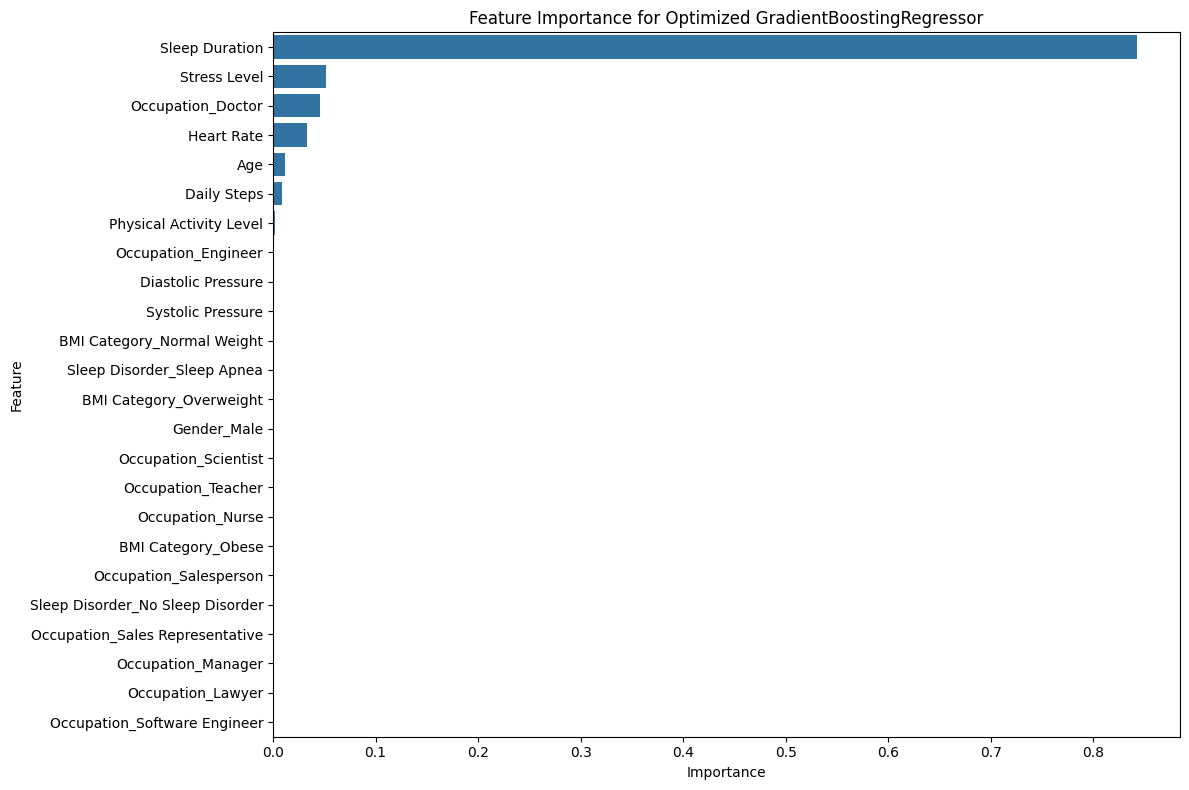

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Acceder al atributo feature_importances_ del mejor modelo GBR
feature_importances_gbr = best_gbr_model.feature_importances_

# 2. Crear un DataFrame de pandas que contenga los nombres de las características y sus importancias
features_df_gbr = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_gbr
})

# 3. Ordenar el DataFrame de importancia de características en orden descendente
features_df_gbr = features_df_gbr.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame de importancias
print("Feature Importances (Optimized GradientBoostingRegressor):")
display(features_df_gbr)

# 4. Visualizar la importancia de las características utilizando un gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_gbr)
plt.title('Feature Importance for Optimized GradientBoostingRegressor')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Preparar el Modelo para Despliegue (Serialización)

### Subtask:
Guardar el modelo GradientBoostingRegressor optimizado en un archivo (por ejemplo, usando `joblib` o `pickle`) para que pueda ser cargado y utilizado fácilmente en una API.


**Reasoning**:
To prepare the optimized GradientBoostingRegressor model for deployment, I will use `joblib` to save the `best_gbr_model` to a file, allowing for easy loading and use in an API.



In [38]:
import joblib

# Save the optimized GradientBoostingRegressor model
joblib.dump(best_gbr_model, 'optimized_gbr_model.joblib')

print("Optimized GradientBoostingRegressor model saved as 'optimized_gbr_model.joblib'")

Optimized GradientBoostingRegressor model saved as 'optimized_gbr_model.joblib'


## Conceptualizar la 'Calculadora' de Calidad del Sueño

### Subtask:
Describir cómo funcionaría la 'calculadora' en la API. Esto incluirá cómo tomar las entradas del usuario (los parámetros del modelo), cómo el modelo generaría una predicción numérica de la calidad del sueño, y cómo esta predicción podría ser 'clasificada' (ej. 'mala', 'regular', 'buena') si el objetivo final es una clasificación cualitativa.


La 'Calculadora' de Calidad del Sueño en la API funcionaría de la siguiente manera:

### 1. Recepción de Entradas del Usuario

La API recibiría los datos de entrada del usuario como un conjunto de parámetros que corresponden a las características más importantes identificadas por el modelo `optimized_gbr_model`. Basándonos en la importancia de las características (`features_df_gbr`), las entradas clave que la API esperaría del usuario incluirían:

*   **Sleep Duration (Duración del Sueño)**: Un valor numérico que representa las horas de sueño.
*   **Stress Level (Nivel de Estrés)**: Un valor numérico que indica el nivel de estrés.
*   **Occupation (Ocupación)**: Una categoría que la API convertiría en su representación one-hot encoded (por ejemplo, `Occupation_Doctor`, `Occupation_Engineer`, etc.).
*   **Heart Rate (Frecuencia Cardíaca)**: Un valor numérico.
*   **Age (Edad)**: Un valor numérico.
*   **Daily Steps (Pasos Diarios)**: Un valor numérico.
*   **Physical Activity Level (Nivel de Actividad Física)**: Un valor numérico.
*   **Systolic Pressure y Diastolic Pressure (Presión Sistólica y Diastólica)**: Valores numéricos.
*   **BMI Category (Categoría de IMC)**: Una categoría que la API convertiría en su representación one-hot encoded (por ejemplo, `BMI Category_Normal`, `BMI Category_Obese`, etc.).
*   **Gender (Género)**: Una categoría que la API convertiría en su representación one-hot encoded (por ejemplo, `Gender_Male`).
*   **Sleep Disorder (Trastorno del Sueño)**: Una categoría que la API convertiría en su representación one-hot encoded (por ejemplo, `Sleep Disorder_Sleep Apnea`, `Sleep Disorder_Insomnia`, `Sleep Disorder_No Sleep Disorder`).

La API debería validar estas entradas para asegurar que están dentro de rangos esperados y en el formato correcto antes de pasarlas al modelo.

### 2. Generación de la Predicción Numérica

Una vez recibidas las entradas del usuario, el proceso sería el siguiente:

1.  **Carga del Modelo**: El modelo `optimized_gbr_model`, que fue previamente guardado como `optimized_gbr_model.joblib`, sería cargado en memoria por la API. Esto se haría una sola vez al iniciar el servicio de la API para optimizar el rendimiento.
    ```python
    import joblib
    loaded_model = joblib.load('optimized_gbr_model.joblib')
    ```
2.  **Preprocesamiento de Entradas**: Las entradas del usuario (que pueden ser en formato legible) serían transformadas al mismo formato numérico y de codificación one-hot que se usó durante el entrenamiento del modelo. Esto significa que si el usuario introduce 'Doctor' como ocupación, la API crearía un vector donde `Occupation_Doctor` sería 1 y las demás categorías de ocupación serían 0.
3.  **Predicción**: La API pasaría las entradas preprocesadas al modelo cargado para obtener una predicción numérica de la 'Quality of Sleep'.
    ```python
    # Suponiendo que user_input_df es un DataFrame con las entradas del usuario preprocesadas
    predicted_quality_score = loaded_model.predict(user_input_df)
    # El resultado sería un array, por ejemplo, [7.85]
    ```
    La salida `predicted_quality_score` sería un valor flotante, por ejemplo, 7.85, que representa la calidad del sueño predicha en una escala de 1 a 9.

### 3. Clasificación Cualitativa de la Predicción

Para hacer la predicción más comprensible y amigable para el usuario, el valor numérico de la calidad del sueño se clasificaría en categorías cualitativas. A continuación, se proponen los rangos y sus categorías:

*   **Mala Calidad del Sueño**: Puntuación de 1.0 a 3.9
    *   `if predicted_quality_score >= 1.0 and predicted_quality_score <= 3.9: 'Mala'`
*   **Calidad de Sueño Regular**: Puntuación de 4.0 a 5.9
    *   `if predicted_quality_score >= 4.0 and predicted_quality_score <= 5.9: 'Regular'`
*   **Buena Calidad del Sueño**: Puntuación de 6.0 a 7.9
    *   `if predicted_quality_score >= 6.0 and predicted_quality_score <= 7.9: 'Buena'`
*   **Excelente Calidad del Sueño**: Puntuación de 8.0 a 9.0
    *   `if predicted_quality_score >= 8.0 and predicted_quality_score <= 9.0: 'Excelente'`

La API devolvería tanto la puntuación numérica predicha como su categoría cualitativa correspondiente al usuario.

## Finalizar Tarea

### Subtask:
Resumir las mejoras obtenidas y las consideraciones para el desarrollo de la API de la calculadora de calidad del sueño.


## Summary:

### Data Analysis Key Findings

*   **Hyperparameter Optimization:** The `GradientBoostingRegressor` was optimized using `GridSearchCV`, yielding an R-squared score of approximately 0.9744 during cross-validation with the following best parameters: `learning_rate`: 0.05, `max_depth`: 5, `min_samples_leaf`: 2, `min_samples_split`: 2, and `n_estimators`: 100.
*   **Optimized Model Performance (Test Set):** On the unseen test set, the optimized `GradientBoostingRegressor` achieved a high R-squared of 0.9977, a Mean Absolute Error (MAE) of 0.0205, and a Mean Squared Error (MSE) of 0.0035, indicating excellent predictive accuracy.
*   **Optimized Model Performance (Cross-Validation):** Cross-validation across 5 folds revealed an average R-squared of 0.7059 ($\pm$ 0.2297), an average MAE of 0.2363 ($\pm$ 0.1638), and an average MSE of 0.2302 ($\pm$ 0.1832). The lower average R-squared and higher error metrics, along with significant standard deviations, suggest some variability in performance across different data subsets compared to the test set performance.
*   **Feature Importance:** "Sleep Duration" was identified as the most crucial feature, accounting for approximately 84.2% of the model's predictive power. Other important features included "Stress Level" (5.1%), "Occupation_Doctor" (4.5%), "Heart Rate", "Age", "Daily Steps", and "Physical Activity Level". Several 'Occupation' categories and 'Sleep Disorder_No Sleep Disorder' had negligible importance.
*   **Model Persistence:** The optimized `GradientBoostingRegressor` model was successfully saved as `optimized_gbr_model.joblib` for deployment.
*   **API Conceptualization:** The proposed API for the sleep quality calculator would accept user inputs for key features (e.g., Sleep Duration, Stress Level, Occupation), preprocess them, and use the loaded model to predict a numerical sleep quality score. This numerical score would then be classified into qualitative categories: 'Mala' (1.0-3.9), 'Regular' (4.0-5.9), 'Buena' (6.0-7.9), and 'Excelente' (8.0-9.0).

### Insights or Next Steps

*   The discrepancy between test set and cross-validation performance (R-squared 0.9977 vs. 0.7059) suggests potential overfitting to the specific training/test split or that the test set might not fully represent the variability of the overall dataset. Further investigation into data distribution, potential data leakage, or alternative cross-validation strategies could be beneficial.
*   Given that "Sleep Duration" is overwhelmingly the most important feature, the API design and user interface should prominently highlight its impact on predicted sleep quality. This insight can be used to guide user input focus and feedback, for example, by suggesting optimal sleep duration ranges.
